In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 基于岭回归和Lasso回归的波士顿房价预测

## 一、导入数据集

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [4]:
df = pd.DataFrame(data=data, columns=feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 二、划分数据集

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=46, random_state=20)

## 三、数据预处理（归一化）

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 四、基于岭回归

In [14]:
ridge = Ridge()

In [15]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [75]:
ridge_score = ridge.score(X_test_scaled, y_test)
ridge_score

0.6684626684007112

In [72]:
ridge_w = ridge.coef_
ridge_b = ridge.intercept_

In [73]:
display(ridge_w, ridge_b)

array([ -4.38763248,   3.59285903,   0.06580682,   3.05692708,
        -7.06574868,  18.08024794,   0.33560646, -12.58573308,
         5.24187579,  -5.24094657,  -8.5674282 ,   3.78211551,
       -18.89501721])

25.847696568589356

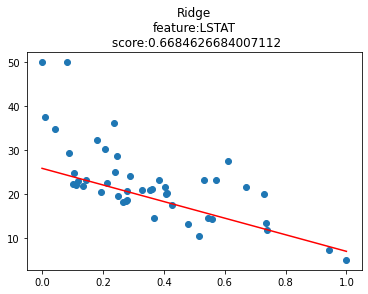

In [76]:
plt.scatter(X_test_scaled[:, -1], y_test)
x = np.linspace(0, 1, num=10)
plt.plot(x, ridge_w[-1]*x+ridge_b, c='r')
plt.title('Ridge\nfeature:LSTAT\n score:{0}'.format(ridge_score))
plt.show()

## 五、基于Lasso回归

In [77]:
lasso = Lasso(alpha=0.1)

In [78]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [79]:
lasso_score = lasso.score(X_test_scaled, y_test)
lasso_score

0.6576539466485214

In [80]:
lasso_w = lasso.coef_
lasso_b = lasso.intercept_

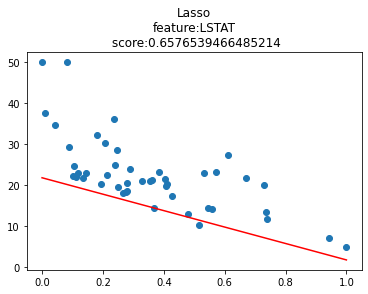

In [81]:
plt.scatter(X_test_scaled[:, -1], y_test)
x = np.linspace(0, 1, num=10)
plt.plot(x, lasso_w[-1]*x+lasso_b, c='r')
plt.title('Lasso\nfeature:LSTAT\n score:{0}'.format(lasso_score))

plt.show()

## 六、岭回归和Lasso回归对比

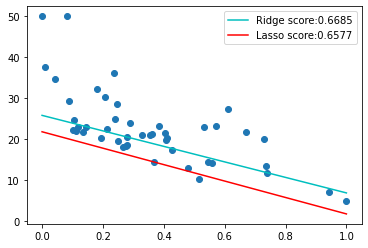

In [85]:
plt.scatter(X_test_scaled[:, -1], y_test)
x = np.linspace(0, 1, num=10)
plt.plot(x, ridge_w[-1]*x+ridge_b, c='c', label='Ridge score:{0:.4f}'.format(ridge_score))
plt.plot(x, lasso_w[-1]*x+lasso_b, c='r', label='Lasso score:{0:.4f}'.format(lasso_score))
plt.legend()
plt.show()